In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#koneksi dar colab ke gdrive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#loading data
path='/content/drive/MyDrive/DataSource/credit_risk_1.csv'

load_data_cc=pd.read_csv(path)
load_data_cc

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [ ]:
df = pd.DataFrame(load_data_cc)
df

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


### *Busines Understanding*

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman.

Pemberi pinjaman biasanya membuat dua jenis keputusan: pertama, apakah akan memberikan kredit kepada pemohon baru, dan kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka. Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya.

Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.


Goal:
1. Prediksi Potensi Nasabah Gagal Bayar
Problem: Klasifikasi

Kemungkinan Algoritma:
a. Decision Tree
b. Random Forest
c. SVM
d. XGboost Tree Clasification



2. Predictive nilai kredit yang akan diberikan kepada nasabah lama (OLd nasabah)
Problem: Estimasi


###*Data Description*

There are 9 attributes containing 850 customer records followed by:

age: Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.

othdebt : utang lainnya

default : Label pelanggan gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal) *Variabel Target*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#input Variabel
x=df[['age', 'ed', 'employ', 'income', 'address', 'debtinc', 'creddebt', 'othdebt']]

#target variabel
y=df['default'].astype('category')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

## DesicionTree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
#object Decison Tree
clf = DecisionTreeClassifier()

#training model
model_clf=clf.fit(x_train,y_train)

#predict model
y_pred_clf=model_clf.predict(x_test)

In [ ]:
#evaluasi klasifikasi
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       153
         1.0       0.43      0.39      0.41        57

    accuracy                           0.70       210
   macro avg       0.61      0.60      0.60       210
weighted avg       0.69      0.70      0.69       210



## Evaluasi

1.   Model dalam mempredik orang yang **Tidak gagal bayar** akurasi sebesar 79%, sedangkan overall accuracy 70%, jadi bisa disimpulkan model OVERFIT dalam mempredik orang yang TIDAK GAGAL BAYAR

2.   Model Underfit dalam mempredik orang yang GAGAL BAYAR. Hal ini ditujukan nilai precisi 45% dan nilai accuracy 70% precisi lebih rendah daripada accuracy (hight accuracy and low precisi)

3. berdasarkan confuction matrix, maka modl pintar dalam mem predict orang ynag tidak gagal bayar

4. Model menggunakan Decision tree tidak bisa di implementasi pada case ini.

Model menggunakan Random Forest tidak bisa diimplementasi
1. hasil Evaluasi setelah tuning model dengan menambahkan hyper parameter :
2. Model dinilai tepat dalam memprediksi nilai 0 (orang yang TIDAK GAGAL BAYAR)
3. Model masih overfit dalam memprediksi nilai 1 (Orang yang GAGAL BAYAR)
4. Model Random Forest Belum bisa diterapkan pada case ini.



Text(113.9222222222222, 0.5, 'Predict Label')

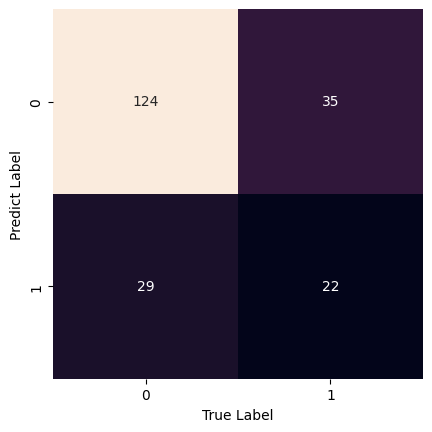

In [ ]:
#menvisualisasikan confustion matrix
mat=confusion_matrix(y_test, y_pred_clf)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

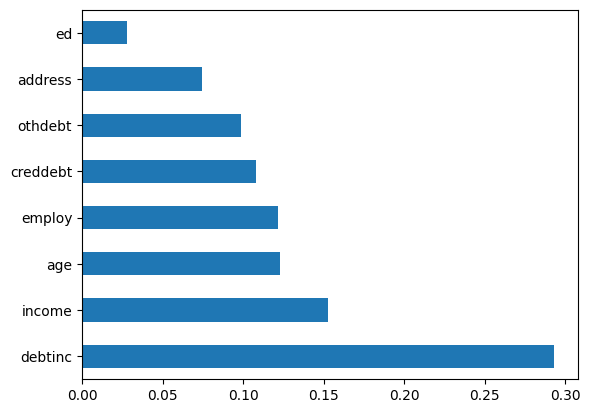

In [ ]:
## Signifikan factor dari awal model

feat_importances = pd.Series(model_clf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#object Decison Tree
rf = RandomForestClassifier()

#training model
model_rf=rf.fit(x_train,y_train)

#predict model
y_pred_rf=model_rf.predict(x_test)#object Decison Tree


## Evaluasi model random forest

In [ ]:
#evaluasi klasifikasi
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86       153
         1.0       0.65      0.35      0.45        57

    accuracy                           0.77       210
   macro avg       0.72      0.64      0.65       210
weighted avg       0.75      0.77      0.75       210



## Hasil evaluasi pemodelan random forrest

## Pemodelan MR

In [ ]:
# Import SVM
from sklearn.svm import SVC

In [ ]:
# Object SVM
svm=SVC(kernel='linear',random_state=0)

# Train Model
model_svm=svm.fit(x_train,y_train)

#Predict Model
y_pred_svm=model_svm.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90       153
         1.0       0.87      0.47      0.61        57

    accuracy                           0.84       210
   macro avg       0.85      0.72      0.76       210
weighted avg       0.84      0.84      0.82       210



## Hasil Evaluasi Permodelan SVM
Model dalam mepredik orang yang tidak gagal bayar akurasi sebesar 82%, sedangkan overall akurasi 81% jadi bisa disimpulkan bahwa model AKURAT dalam mempredik orang yang TIDAK GAGAL BAYAR
Model OVERFIT dalam mempredik orang yang gagal bayar. hal ini ditunjukan nilai precisi 73% dan nilai akurasi overall 81%. artinya precisi lebih rendah daripada akurasi (High acuracy)
berdasarkan confusion matriks, maka model pintar dalam mempredik orang yang tidak gagal bayar
Model menggunakan Random Forest tidak bisa diimplementasi

Text(113.9222222222222, 0.5, 'Predict Label')

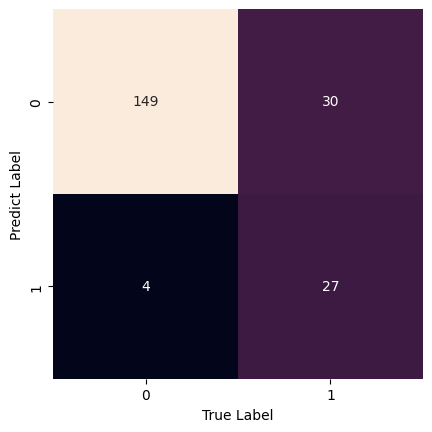

In [ ]:
# Memvisualisasikan confusion matrix SVM
mat=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

## Pemodelan Manggunakan XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#object Decison Tree
xgb = XGBClassifier()

#training model
model_xgb=xgb.fit(x_train,y_train)

#predict model
y_pred_xgb=model_xgb.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       153
         1.0       0.63      0.46      0.53        57

    accuracy                           0.78       210
   macro avg       0.73      0.68      0.69       210
weighted avg       0.77      0.78      0.77       210



<Axes: >

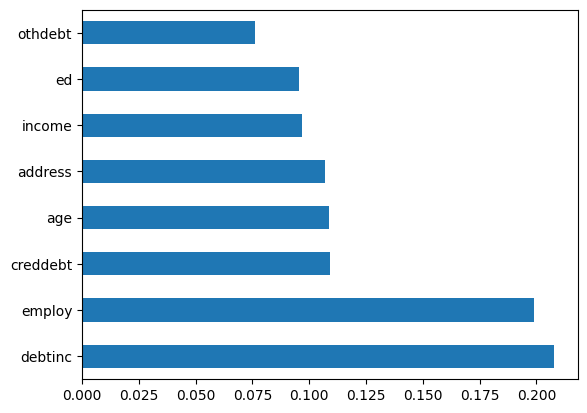

In [ ]:
## Signifikan factor dari awal model

feat_importances = pd.Series(model_xgb.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

Text(113.9222222222222, 0.5, 'Predict Label')

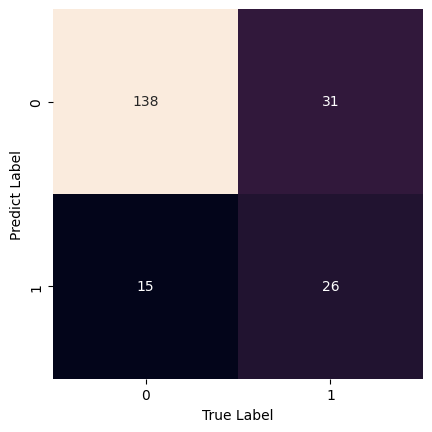

In [ ]:
# Memvisualisasikan confusion matrix SVM
mat=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

## Implementasi mechine Learning MODEL SVM

In [ ]:
#Loading data nnew nasabah
path_newNasabah='/content/drive/MyDrive/DataSource/credit_risk_newCust.csv'
load_data_newNasabah = pd.read_csv(path_newNasabah)
load_data_newNasabah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [ ]:
df_newNasabah = pd.DataFrame(load_data_newNasabah)
df_newNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [ ]:
x1=df_newNasabah[['age', 'ed', 'employ', 'income', 'address', 'debtinc', 'creddebt', 'othdebt']]

##Applying Model SVM

In [ ]:
y_predict_newNasabah = model_svm.predict(x1)
y_predict_newNasabah

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#mengubah hasil permodelan yang berbentuk array menjadi dataframe
df_predict_newNasabah = pd.DataFrame({'Prediction_GagalBayar': y_predict_newNasabah}).round(2)

In [ ]:
df_predict_newNasabah

,Prediction_GagalBayar
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [ ]:
#menggabungkan dataset newNasabah dengan hasil predictny
df_hasil_predict_svm=pd.concat([df_newNasabah,df_predict_newNasabah], sort=False, axis=1)
df_hasil_predict_svm.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction_GagalBayar
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.0
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.0
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,1.0
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.0
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.0


In [ ]:
df_hasil_predict_svm['Prediction_GagalBayar'].value_counts()

0.0    129
1.0     21
Name: Prediction_GagalBayar, dtype: int64

## 2. Predictive nilai kredit yang akan diberikan kepada nasabah lama (old nasabah)

problem: estimasi

Kemungkinan Algoritma yangakan digunakan:
1. linier regresion
2. MLP regressor (ANN)

In [ ]:
#create object baru
df_oldNasabah=df
df_oldNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


##Data Preparation

In [ ]:
df_oldNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [ ]:
#kenaikan nilai kredit diberikan kepada nasabah lama yang tidak pernah gagal bayar
df_oldNasabah1 = df_oldNasabah[(df_oldNasabah['default']==0)&(df_oldNasabah['creddebt']<0.3)]
df_oldNasabah1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 693
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  115 non-null    int64  
 1   age         115 non-null    int64  
 2   ed          115 non-null    int64  
 3   employ      115 non-null    int64  
 4   address     115 non-null    int64  
 5   income      115 non-null    int64  
 6   debtinc     115 non-null    float64
 7   creddebt    115 non-null    float64
 8   othdebt     115 non-null    float64
 9   default     115 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 9.9 KB


In [ ]:
df_oldNasabah1

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0
...,...,...,...,...,...,...,...,...,...,...
679,679,35,1,17,4,42,3.0,0.093240,1.166760,0.0
683,683,21,1,1,1,16,6.3,0.141120,0.866880,0.0
689,689,30,1,4,2,18,10.7,0.227268,1.698732,0.0
690,690,24,2,0,5,16,7.3,0.024528,1.143472,0.0


<Axes: title={'center': 'Pearson Correlation'}>

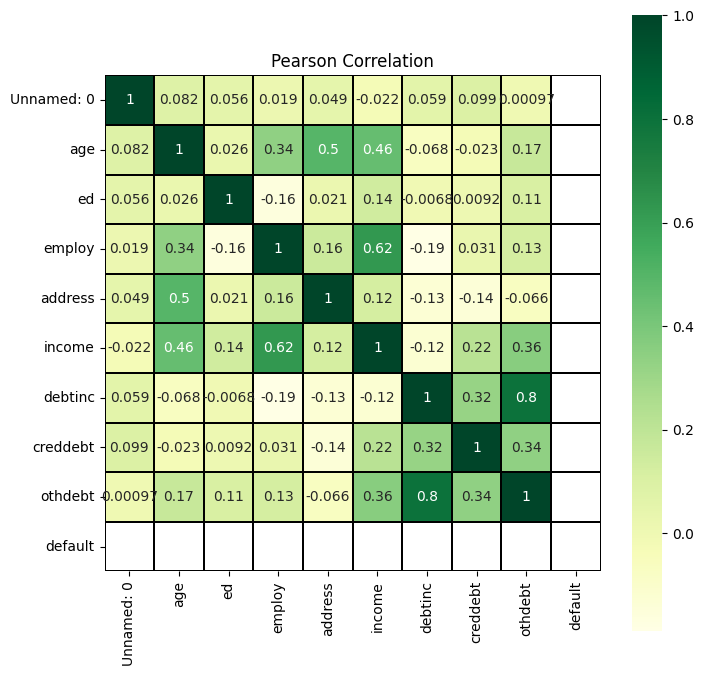

In [ ]:
f, ax = plt.subplots(figsize=(8,8))
plt.title('Pearson Correlation')
sns.heatmap(df_oldNasabah1.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

In [ ]:
#menentukan input variabel
x2=df_oldNasabah1[['age', 'ed', 'employ', 'income', 'address', 'debtinc', 'creddebt', 'othdebt', 'default']]
#menentukan target variabel
y2=df_oldNasabah1['']
